# Run All

## Import and Load

In [179]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams

import datetime as dt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [180]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

In [3]:
df_loan = pd.read_csv('https://drive.google.com/uc?id=18dZ1xq3950S7IoCm1MBZsGa99WfJKT7R&confirm=t', low_memory=False)

In [4]:
df_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_loan.shape

(466285, 75)

## Data Preprocessing

### Drop Kolom dengan Nilai NaN Banyak (>4.5%)

In [6]:
kolom_kosong = df_loan.isnull().sum().sort_values(ascending=False)
kolom_kosong

inq_last_12m                 466285
total_bal_il                 466285
dti_joint                    466285
verification_status_joint    466285
annual_inc_joint             466285
                              ...  
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
out_prncp                         0
Length: 75, dtype: int64

In [7]:
for index, values in kolom_kosong.iteritems():
  print(index, ' = ', values)

inq_last_12m  =  466285
total_bal_il  =  466285
dti_joint  =  466285
verification_status_joint  =  466285
annual_inc_joint  =  466285
open_acc_6m  =  466285
open_il_6m  =  466285
open_il_12m  =  466285
open_il_24m  =  466285
mths_since_rcnt_il  =  466285
il_util  =  466285
open_rv_24m  =  466285
total_cu_tl  =  466285
inq_fi  =  466285
max_bal_bc  =  466285
all_util  =  466285
open_rv_12m  =  466285
mths_since_last_record  =  403647
mths_since_last_major_derog  =  367311
desc  =  340302
mths_since_last_delinq  =  250351
next_pymnt_d  =  227214
tot_cur_bal  =  70276
tot_coll_amt  =  70276
total_rev_hi_lim  =  70276
emp_title  =  27588
emp_length  =  21008
last_pymnt_d  =  376
revol_util  =  340
collections_12_mths_ex_med  =  145
last_credit_pull_d  =  42
inq_last_6mths  =  29
earliest_cr_line  =  29
delinq_2yrs  =  29
open_acc  =  29
pub_rec  =  29
acc_now_delinq  =  29
total_acc  =  29
title  =  20
annual_inc  =  4
application_type  =  0
policy_code  =  0
collection_recovery_fee  =  0


In [8]:
kolom_kosong = {x:y for x,y in kolom_kosong.items() if y!=0}
kolom_kosong

{'acc_now_delinq': 29,
 'all_util': 466285,
 'annual_inc': 4,
 'annual_inc_joint': 466285,
 'collections_12_mths_ex_med': 145,
 'delinq_2yrs': 29,
 'desc': 340302,
 'dti_joint': 466285,
 'earliest_cr_line': 29,
 'emp_length': 21008,
 'emp_title': 27588,
 'il_util': 466285,
 'inq_fi': 466285,
 'inq_last_12m': 466285,
 'inq_last_6mths': 29,
 'last_credit_pull_d': 42,
 'last_pymnt_d': 376,
 'max_bal_bc': 466285,
 'mths_since_last_delinq': 250351,
 'mths_since_last_major_derog': 367311,
 'mths_since_last_record': 403647,
 'mths_since_rcnt_il': 466285,
 'next_pymnt_d': 227214,
 'open_acc': 29,
 'open_acc_6m': 466285,
 'open_il_12m': 466285,
 'open_il_24m': 466285,
 'open_il_6m': 466285,
 'open_rv_12m': 466285,
 'open_rv_24m': 466285,
 'pub_rec': 29,
 'revol_util': 340,
 'title': 20,
 'tot_coll_amt': 70276,
 'tot_cur_bal': 70276,
 'total_acc': 29,
 'total_bal_il': 466285,
 'total_cu_tl': 466285,
 'total_rev_hi_lim': 70276,
 'verification_status_joint': 466285}

In [9]:
kolom_kosong = pd.Series(kolom_kosong)
kolom_kosong.sort_values(ascending=False)

inq_last_12m                   466285
mths_since_rcnt_il             466285
open_rv_12m                    466285
all_util                       466285
max_bal_bc                     466285
inq_fi                         466285
total_cu_tl                    466285
open_rv_24m                    466285
total_bal_il                   466285
il_util                        466285
open_il_24m                    466285
open_il_12m                    466285
open_il_6m                     466285
open_acc_6m                    466285
annual_inc_joint               466285
verification_status_joint      466285
dti_joint                      466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_cur_bal                     70276
tot_coll_amt                    70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

In [10]:
def addlabels(x):
    for i in range(len(x)):
      if ((x[i]/df_loan.shape[0]*100 != 100) or (i==0)):
        plt.text(i, x[i]+10000, format(x[i]/df_loan.shape[0]*100, ".2f") + '%', ha = 'center')

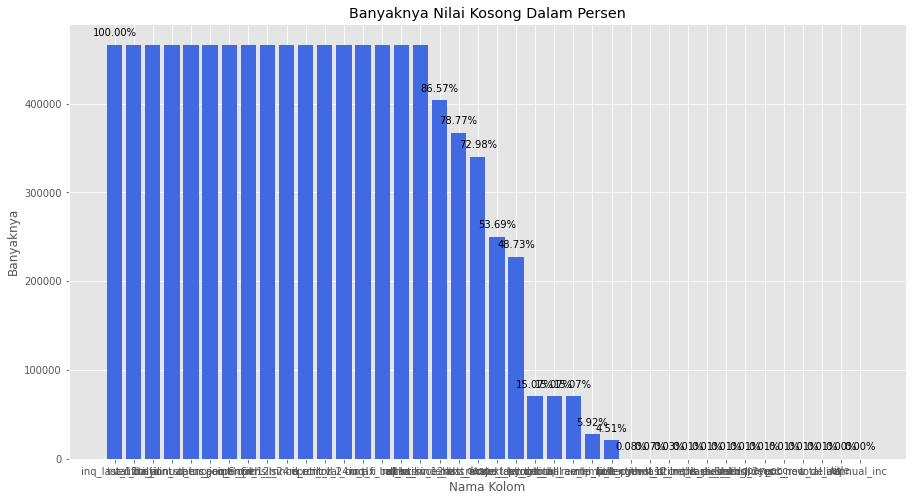

In [11]:
plt.bar(kolom_kosong.index, kolom_kosong.values, color='royalblue')
addlabels(kolom_kosong.values)
plt.title('Banyaknya Nilai Kosong Dalam Persen')
plt.xlabel('Nama Kolom')
plt.ylabel('Banyaknya')
plt.show()

In [12]:
kolom_null = list({x:y for x,y in kolom_kosong.items() if y/df_loan.shape[0]*100 < 4.5})
kolom_null

['last_pymnt_d',
 'revol_util',
 'collections_12_mths_ex_med',
 'last_credit_pull_d',
 'inq_last_6mths',
 'earliest_cr_line',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'acc_now_delinq',
 'total_acc',
 'title',
 'annual_inc']

In [13]:
kolom_drop = list({x:y for x,y in kolom_kosong.items() if y/df_loan.shape[0]*100 > 4.5}.keys())
kolom_drop

['inq_last_12m',
 'total_bal_il',
 'dti_joint',
 'verification_status_joint',
 'annual_inc_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'il_util',
 'open_rv_24m',
 'total_cu_tl',
 'inq_fi',
 'max_bal_bc',
 'all_util',
 'open_rv_12m',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'desc',
 'mths_since_last_delinq',
 'next_pymnt_d',
 'tot_cur_bal',
 'tot_coll_amt',
 'total_rev_hi_lim',
 'emp_title',
 'emp_length']

In [14]:
df_loan_clean = df_loan.drop(columns=kolom_drop)
df_loan_clean.shape

(466285, 48)

### Handling Missing Value Kolom yang Lain

In [15]:
df_loan_clean[kolom_null]

,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,inq_last_6mths,earliest_cr_line,delinq_2yrs,open_acc,pub_rec,acc_now_delinq,total_acc,title,annual_inc
0,Jan-15,83.7,0.0,Jan-16,1.0,Jan-85,0.0,3.0,0.0,0.0,9.0,Computer,24000.0
1,Apr-13,9.4,0.0,Sep-13,5.0,Apr-99,0.0,3.0,0.0,0.0,4.0,bike,30000.0
2,Jun-14,98.5,0.0,Jan-16,2.0,Nov-01,0.0,2.0,0.0,0.0,10.0,real estate business,12252.0
3,Jan-15,21.0,0.0,Jan-15,1.0,Feb-96,0.0,10.0,0.0,0.0,37.0,personel,49200.0
4,Jan-16,53.9,0.0,Jan-16,0.0,Jan-96,0.0,15.0,0.0,0.0,38.0,Personal,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,Jan-16,77.6,0.0,Jan-16,2.0,Apr-03,0.0,18.0,0.0,0.0,36.0,Debt consolidation,110000.0
466281,Dec-14,46.3,0.0,Jan-16,5.0,Jun-97,0.0,18.0,1.0,0.0,30.0,Debt consolidation,78000.0
466282,Jan-16,51.1,0.0,Dec-15,2.0,Dec-01,0.0,18.0,0.0,0.0,43.0,Debt consolidation,46000.0
466283,Dec-14,21.5,0.0,Apr-15,1.0,Feb-03,3.0,21.0,0.0,0.0,27.0,Credit card refinancing,83000.0


In [16]:
df_loan_clean[kolom_null].dtypes

last_pymnt_d                   object
revol_util                    float64
collections_12_mths_ex_med    float64
last_credit_pull_d             object
inq_last_6mths                float64
earliest_cr_line               object
delinq_2yrs                   float64
open_acc                      float64
pub_rec                       float64
acc_now_delinq                float64
total_acc                     float64
title                          object
annual_inc                    float64
dtype: object

In [17]:
df_loan_clean[kolom_null].isnull().sum()

last_pymnt_d                  376
revol_util                    340
collections_12_mths_ex_med    145
last_credit_pull_d             42
inq_last_6mths                 29
earliest_cr_line               29
delinq_2yrs                    29
open_acc                       29
pub_rec                        29
acc_now_delinq                 29
total_acc                      29
title                          20
annual_inc                      4
dtype: int64

#### Kolom 'title'

In [18]:
df_loan_clean['title'].value_counts()

Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
Credit Card Clearance                     1
credit repayment                          1
medical bills/credit card payoff          1
One Time Only Relief!                     1
Paying off the car and some bills         1
Name: title, Length: 63099, dtype: int64

In [19]:
df_loan_clean['title'].mode()[0]

'Debt consolidation'

In [20]:
df_loan_clean['title'].fillna(df_loan_clean['title'].mode()[0], inplace=True)
df_loan_clean.shape

(466285, 48)

#### Kolom Berupa Date

In [21]:
kolom_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [22]:
df_loan_clean[kolom_date].isnull().sum()

issue_d                 0
earliest_cr_line       29
last_pymnt_d          376
last_credit_pull_d     42
dtype: int64

In [23]:
df_loan_clean.dropna(subset = kolom_date, inplace=True)
df_loan_clean[kolom_date].isnull().sum()

issue_d               0
earliest_cr_line      0
last_pymnt_d          0
last_credit_pull_d    0
dtype: int64

In [24]:
df_loan_clean.shape

(465839, 48)

#### Kolom Numerik Lainnya

In [25]:
df_loan_clean[kolom_null].isnull().sum()

last_pymnt_d                    0
revol_util                    305
collections_12_mths_ex_med    115
last_credit_pull_d              0
inq_last_6mths                  0
earliest_cr_line                0
delinq_2yrs                     0
open_acc                        0
pub_rec                         0
acc_now_delinq                  0
total_acc                       0
title                           0
annual_inc                      0
dtype: int64

In [26]:
df_loan_clean[['revol_util', 'collections_12_mths_ex_med']] = df_loan_clean[['revol_util', 'collections_12_mths_ex_med']].fillna(df_loan_clean[['revol_util', 'collections_12_mths_ex_med']].median())
df_loan_clean[kolom_null].isnull().sum()

last_pymnt_d                  0
revol_util                    0
collections_12_mths_ex_med    0
last_credit_pull_d            0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
open_acc                      0
pub_rec                       0
acc_now_delinq                0
total_acc                     0
title                         0
annual_inc                    0
dtype: int64

In [27]:
df_loan_clean.reset_index(drop=True, inplace=True)
df_loan_clean.shape

(465839, 48)

### Drop Kolom Nominal atau hanya 1 Value

In [28]:
df_loan_clean.dtypes

Unnamed: 0                      int64
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

In [29]:
kolom_object = df_loan_clean.select_dtypes(object).columns
df_loan_clean[kolom_object].head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [30]:
df_loan_clean[kolom_object].nunique()

term                        2
grade                       7
sub_grade                  35
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    465839
purpose                    14
title                   63014
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64

In [31]:
df_loan_clean.drop(columns=['url', 'title', 'zip_code', 'application_type', 'addr_state'], inplace=True)
kolom_object = df_loan_clean.select_dtypes(object).columns
df_loan_clean[kolom_object].nunique()

term                     2
grade                    7
sub_grade               35
home_ownership           6
verification_status      3
issue_d                 91
loan_status              9
pymnt_plan               2
purpose                 14
earliest_cr_line       664
initial_list_status      2
last_pymnt_d            98
last_credit_pull_d     103
dtype: int64

In [32]:
df_loan_clean.shape

(465839, 43)

### Kolom Date Menjadi Numerik

In [33]:
df_loan_clean[kolom_date].tail()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
465834,Jan-14,Apr-03,Jan-16,Jan-16
465835,Jan-14,Jun-97,Dec-14,Jan-16
465836,Jan-14,Dec-01,Jan-16,Dec-15
465837,Jan-14,Feb-03,Dec-14,Apr-15
465838,Jan-14,Feb-00,Jan-16,Jan-16


Estimasi 30 detik

In [34]:
new_issue_d = []
new_earliest_cr_line = []
new_last_pymnt_d = []
new_last_credit_pull_d = []

for i in range(df_loan_clean.shape[0]):
  new_issue_d.append(dt.datetime.strptime(df_loan_clean['issue_d'][i], '%b-%y'))
  new_earliest_cr_line.append(dt.datetime.strptime(df_loan_clean['earliest_cr_line'][i], '%b-%y'))
  new_last_pymnt_d.append(dt.datetime.strptime(df_loan_clean['last_pymnt_d'][i], '%b-%y'))
  new_last_credit_pull_d.append(dt.datetime.strptime(df_loan_clean['last_credit_pull_d'][i], '%b-%y'))

In [35]:
waktu_sekarang = dt.datetime.now()
waktu_sekarang

datetime.datetime(2022, 6, 5, 4, 23, 1, 59976)

In [36]:
def selisih_bulan(sekarang, yang_dikurangi):
  return (sekarang - yang_dikurangi).days//30

In [37]:
month_issue_d = []
month_earliest_cr_line = []
month_last_pymnt_d = []
month_last_credit_pull_d = []

for i in range(df_loan_clean.shape[0]):
  month_issue_d.append(selisih_bulan(waktu_sekarang, new_issue_d[i]))
  month_earliest_cr_line.append(selisih_bulan(waktu_sekarang, new_earliest_cr_line[i]))
  month_last_pymnt_d.append(selisih_bulan(waktu_sekarang, new_last_pymnt_d[i]))
  month_last_credit_pull_d.append(selisih_bulan(waktu_sekarang, new_last_credit_pull_d[i]))

In [38]:
df_loan_clean['issue_d'] = month_issue_d
df_loan_clean['earliest_cr_line']= month_earliest_cr_line
df_loan_clean['last_pymnt_d'] = month_last_pymnt_d
df_loan_clean['last_credit_pull_d'] = month_last_credit_pull_d

In [39]:
kolom_object = df_loan_clean.select_dtypes(object).columns
df_loan_clean[kolom_object].nunique()

term                    2
grade                   7
sub_grade              35
home_ownership          6
verification_status     3
loan_status             9
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

In [40]:
df_loan_clean.shape

(465839, 43)

### Label Target Encoder

In [41]:
le = LabelEncoder()
le.fit(df_loan_clean['verification_status'])
le.classes_

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [42]:
new_verification_status = le.transform(df_loan_clean['verification_status'])
new_verification_status

array([2, 1, 0, ..., 2, 2, 2])

In [43]:
df_loan_clean['verification_status'] = new_verification_status
df_loan_clean['verification_status']

0         2
1         1
2         0
3         1
4         1
         ..
465834    1
465835    2
465836    2
465837    2
465838    2
Name: verification_status, Length: 465839, dtype: int64

In [44]:
df_loan_clean.shape

(465839, 43)

### Drop Kolom Tidak Perlu (ID)

In [45]:
df_loan_clean.drop(columns=['Unnamed: 0', 'id', 'member_id'], inplace=True)
df_loan_clean.shape

(465839, 40)

### Mengubah Subgrade menjadi INT64

In [46]:
new_sub_grade = []

for i in range(df_loan_clean.shape[0]):
  new_sub_grade.append(df_loan_clean['sub_grade'][i][1])

# new_sub_grade

In [47]:
df_loan_clean['sub_grade'] = new_sub_grade
df_loan_clean['sub_grade'].head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: object

In [48]:
df_loan_clean.shape

(465839, 40)

In [49]:
df_loan_clean['sub_grade'].astype('int64')

0         2
1         4
2         5
3         1
4         5
         ..
465834    2
465835    5
465836    1
465837    4
465838    3
Name: sub_grade, Length: 465839, dtype: int64

### Kolom Categorical Lainnya

In [50]:
kolom_object = df_loan_clean.select_dtypes(object).columns
df_loan_clean[kolom_object].nunique()

term                    2
grade                   7
sub_grade               5
home_ownership          6
loan_status             9
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

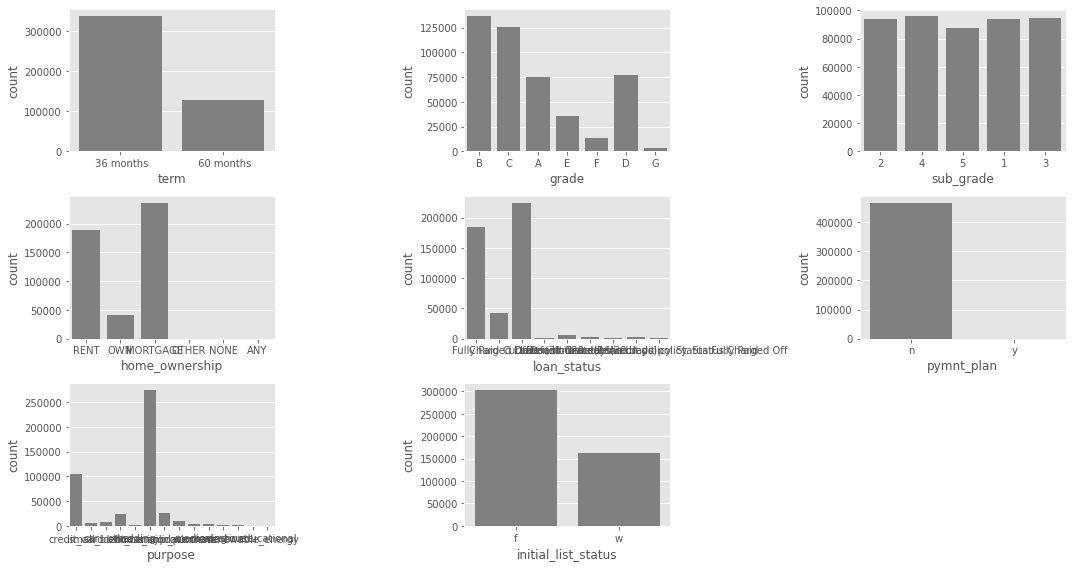

In [52]:
for i in range(0, len(kolom_object)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df_loan_clean[kolom_object[i]], color='gray', orient='v')
    plt.tight_layout()

In [53]:
df_loan_clean['home_ownership'].value_counts()

MORTGAGE    235748
RENT        188208
OWN          41654
OTHER          182
NONE            46
ANY              1
Name: home_ownership, dtype: int64

In [54]:
df_loan_clean['pymnt_plan'].value_counts()

n    465830
y         9
Name: pymnt_plan, dtype: int64

In [55]:
df_loan_clean.drop(columns=['pymnt_plan'], inplace=True)
df_loan_clean.shape

(465839, 39)

In [56]:
kolom_object = df_loan_clean.select_dtypes(object).columns
df_loan_clean[kolom_object].nunique()

term                    2
grade                   7
sub_grade               5
home_ownership          6
loan_status             9
purpose                14
initial_list_status     2
dtype: int64

In [57]:
hasil_encoding = pd.get_dummies(df_loan_clean[kolom_object])
hasil_encoding

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_1,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465834,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465835,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
465836,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
465837,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
hasil_encoding.shape

(465839, 45)

In [59]:
len(kolom_object)

7

In [60]:
df_loan_clean = pd.concat([df_loan_clean, hasil_encoding], axis=1)
df_loan_clean.drop(columns=kolom_object, inplace=True)
df_loan_clean.shape

(465839, 77)

Catatan : Jumlah Fitur tetap 39 walaupun jumlah kolom menjadi 77 karena hasil One Hot Encoding, karena 77 (banyak kolom sekarang) - 45 (kolom one hot encoding) + 7 (kolom sebelum one hot encoding) = 39

## Data Exploration

In [61]:
for tipe in df_loan_clean.dtypes.items():
  print(tipe)

('loan_amnt', dtype('int64'))
('funded_amnt', dtype('int64'))
('funded_amnt_inv', dtype('float64'))
('int_rate', dtype('float64'))
('installment', dtype('float64'))
('annual_inc', dtype('float64'))
('verification_status', dtype('int64'))
('issue_d', dtype('int64'))
('dti', dtype('float64'))
('delinq_2yrs', dtype('float64'))
('earliest_cr_line', dtype('int64'))
('inq_last_6mths', dtype('float64'))
('open_acc', dtype('float64'))
('pub_rec', dtype('float64'))
('revol_bal', dtype('int64'))
('revol_util', dtype('float64'))
('total_acc', dtype('float64'))
('out_prncp', dtype('float64'))
('out_prncp_inv', dtype('float64'))
('total_pymnt', dtype('float64'))
('total_pymnt_inv', dtype('float64'))
('total_rec_prncp', dtype('float64'))
('total_rec_int', dtype('float64'))
('total_rec_late_fee', dtype('float64'))
('recoveries', dtype('float64'))
('collection_recovery_fee', dtype('float64'))
('last_pymnt_d', dtype('int64'))
('last_pymnt_amnt', dtype('float64'))
('last_credit_pull_d', dtype('int64'))


In [62]:
kolom_int64 = df_loan_clean.select_dtypes('int64').columns
kolom_float64 = df_loan_clean.select_dtypes('float64').columns

print(len(kolom_int64), len(kolom_float64))

9 23


### Kolom INT64

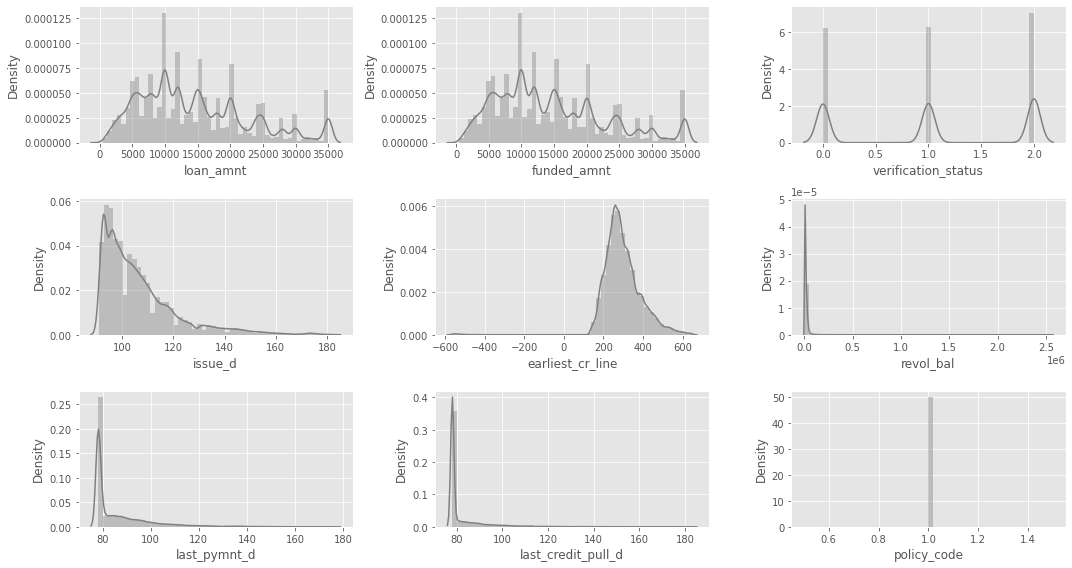

In [63]:
for i in range(0, len(kolom_int64)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_loan_clean[kolom_int64[i]], color='gray')
    plt.tight_layout()

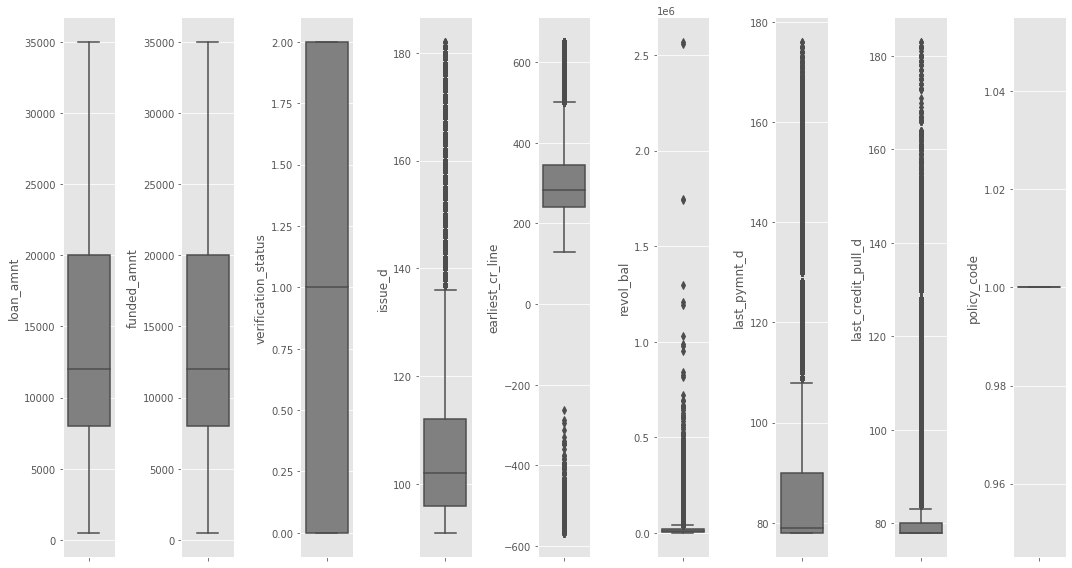

In [64]:
for i in range(0, len(kolom_int64)):
    plt.subplot(1, len(kolom_int64), i+1)
    sns.boxplot(y=df_loan_clean[kolom_int64[i]], color='gray', orient='v')
    plt.tight_layout()

In [65]:
df_loan_clean['policy_code'].value_counts()

1    465839
Name: policy_code, dtype: int64

In [66]:
df_loan_clean.drop(columns=['policy_code'], inplace=True)
df_loan_clean.shape

(465839, 76)

In [67]:
new_earliest_cr_line = np.where(df_loan_clean['earliest_cr_line'] < 0, 0, df_loan_clean['earliest_cr_line'])
new_earliest_cr_line

array([455, 282, 250, ..., 249, 235, 272])

In [68]:
df_loan_clean['earliest_cr_line'][df_loan_clean['earliest_cr_line'] < 0].count()

1167

In [69]:
df_loan_clean['earliest_cr_line'] = new_earliest_cr_line
df_loan_clean.shape

(465839, 76)

### Kolom Float 64

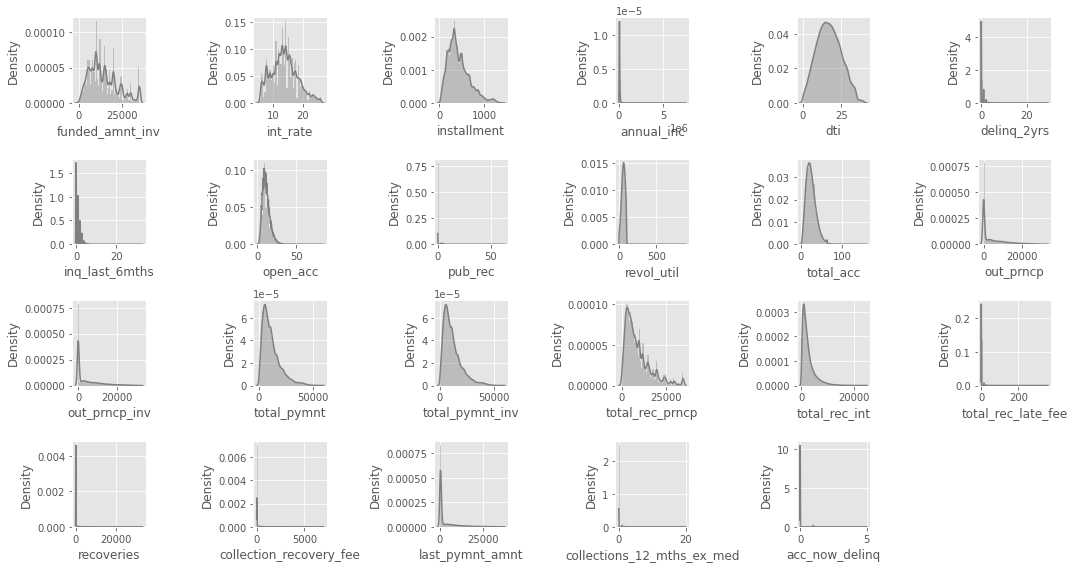

In [70]:
for i in range(0, len(kolom_float64)):
    plt.subplot(4, 6, i+1)
    sns.distplot(df_loan_clean[kolom_float64[i]], color='gray')
    plt.tight_layout()

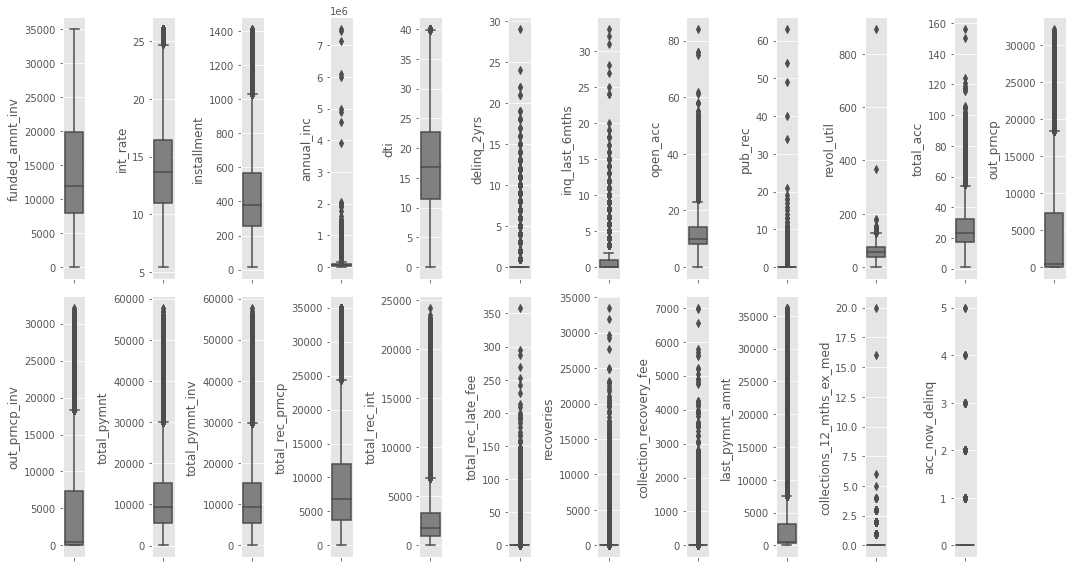

In [72]:
for i in range(0, len(kolom_float64)):
    plt.subplot(2, 12, i+1)
    sns.boxplot(y=df_loan_clean[kolom_float64[i]], color='gray', orient='v')
    plt.tight_layout()

## Seleksi Fitur

In [73]:
df_loan_clean['verification_status_label'] = new_verification_status
df_loan_clean.drop(columns=['verification_status'], inplace=True)
df_loan_clean.shape

(465839, 76)

In [74]:
df_loan_clean

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,verification_status_label
0,5000,5000,4975.0,10.65,162.87,24000.0,127,27.65,0.0,455,...,0,0,0,0,0,0,0,1,0,2
1,2500,2500,2500.0,15.27,59.83,30000.0,127,1.00,0.0,282,...,0,0,0,0,0,0,0,1,0,1
2,2400,2400,2400.0,15.96,84.33,12252.0,127,8.72,0.0,250,...,0,0,0,0,1,0,0,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,127,20.00,0.0,320,...,0,0,1,0,0,0,0,1,0,1
4,3000,3000,3000.0,12.69,67.79,80000.0,127,17.94,0.0,321,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465834,18400,18400,18400.0,14.47,432.64,110000.0,102,19.85,0.0,233,...,0,0,0,0,0,0,0,0,1,1
465835,22000,22000,22000.0,19.97,582.50,78000.0,102,18.45,0.0,304,...,0,0,0,0,0,0,0,1,0,2
465836,20700,20700,20700.0,16.99,514.34,46000.0,102,25.65,0.0,249,...,0,0,0,0,0,0,0,1,0,2
465837,2000,2000,2000.0,7.90,62.59,83000.0,102,5.39,3.0,235,...,0,0,0,0,0,0,0,0,1,2


In [75]:
X = df_loan_clean.iloc[:,:-1]
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000,5000,4975.0,10.65,162.87,24000.0,127,27.65,0.0,455,...,0,0,0,0,0,0,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30000.0,127,1.00,0.0,282,...,0,0,0,0,0,0,0,0,1,0
2,2400,2400,2400.0,15.96,84.33,12252.0,127,8.72,0.0,250,...,0,0,0,0,0,1,0,0,1,0
3,10000,10000,10000.0,13.49,339.31,49200.0,127,20.00,0.0,320,...,0,0,0,1,0,0,0,0,1,0
4,3000,3000,3000.0,12.69,67.79,80000.0,127,17.94,0.0,321,...,0,0,0,1,0,0,0,0,1,0


In [76]:
y = df_loan_clean.iloc[:,-1]
y.head()

0    2
1    1
2    0
3    1
4    1
Name: verification_status_label, dtype: int64

Estimasi 3 Menit

In [118]:
et = ExtraTreesClassifier()
et = et.fit(X, y)

In [123]:
top_fitur = pd.Series(et.feature_importances_, index=X.columns)
top_10 = top_fitur.sort_values(ascending=False).head(10)
top_10

issue_d            0.046552
dti                0.042107
funded_amnt_inv    0.040502
total_rec_int      0.038746
loan_amnt          0.037295
total_pymnt_inv    0.037177
total_pymnt        0.036725
funded_amnt        0.036209
annual_inc         0.035587
installment        0.034777
dtype: float64

In [124]:
fitur_terpilih = list(top_10.index)
fitur_terpilih.append('verification_status_label')
fitur_terpilih

['issue_d',
 'dti',
 'funded_amnt_inv',
 'total_rec_int',
 'loan_amnt',
 'total_pymnt_inv',
 'total_pymnt',
 'funded_amnt',
 'annual_inc',
 'installment',
 'verification_status_label']

In [125]:
df_loan_model = df_loan_clean[fitur_terpilih]
df_loan_model.head()

,issue_d,dti,funded_amnt_inv,total_rec_int,loan_amnt,total_pymnt_inv,total_pymnt,funded_amnt,annual_inc,installment,verification_status_label
0,127,27.65,4975.0,861.07,5000,5831.78,5861.071414,5000,24000.0,162.87,2
1,127,1.00,2500.0,435.17,2500,1008.71,1008.710000,2500,30000.0,59.83,1
2,127,8.72,2400.0,603.65,2400,3003.65,3003.653644,2400,12252.0,84.33,0
3,127,20.00,10000.0,2209.33,10000,12226.30,12226.302210,10000,49200.0,339.31,1
4,127,17.94,3000.0,1009.07,3000,3242.17,3242.170000,3000,80000.0,67.79,1


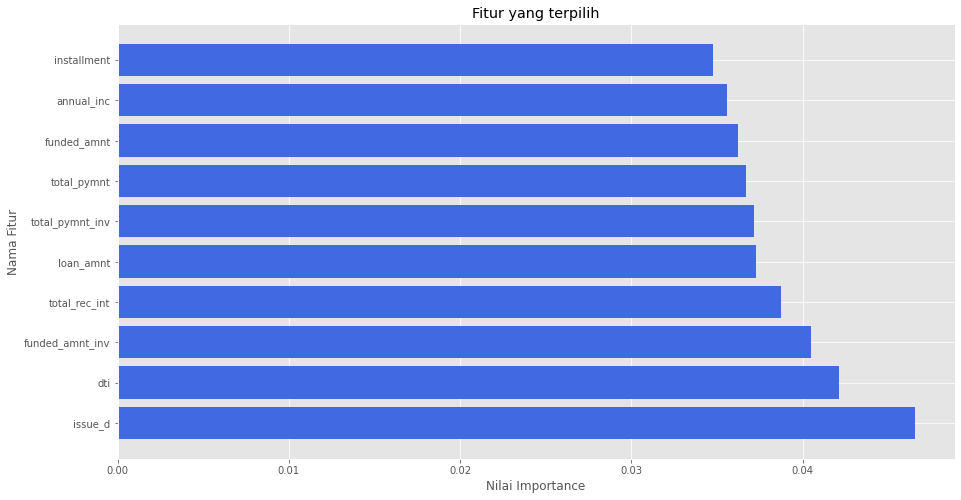

In [130]:
plt.barh(y=top_10.index, width=top_10.values, color='royalblue')
plt.title('Fitur yang terpilih')
plt.xlabel('Nilai Importance')
plt.ylabel('Nama Fitur')
plt.show()

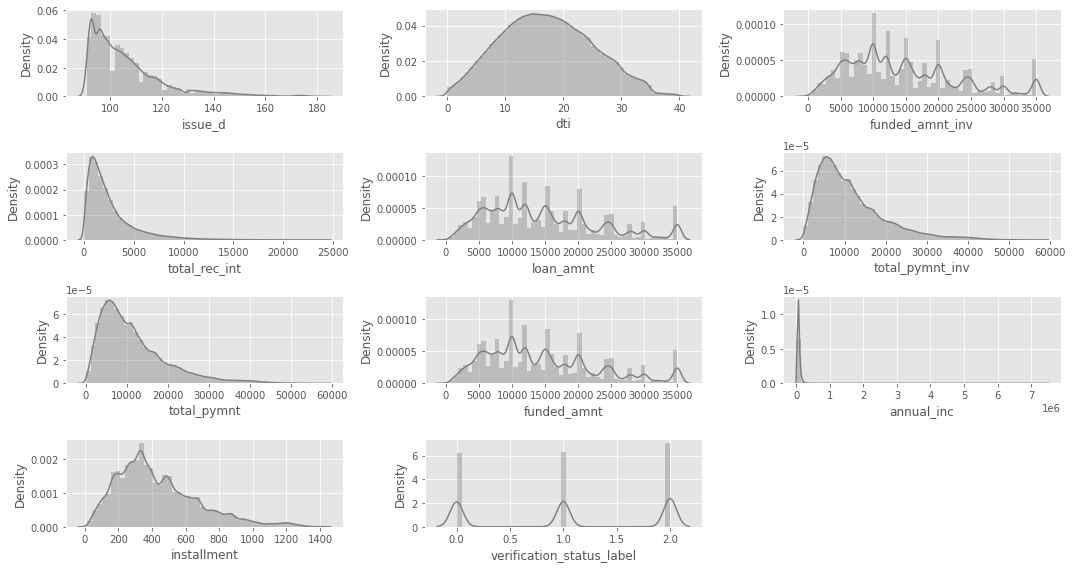

In [131]:
for i in range(0, len(df_loan_model.columns)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df_loan_clean[df_loan_model.columns[i]], color='gray')
    plt.tight_layout()

In [132]:
df_loan_model.describe()

,issue_d,dti,funded_amnt_inv,total_rec_int,loan_amnt,total_pymnt_inv,total_pymnt,funded_amnt,annual_inc,installment,verification_status_label
count,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,4.658390e+05,465839.000000,465839.000000
mean,106.326986,17.220698,14226.100041,2590.972330,14320.476602,11479.193154,11549.816666,14294.980240,7.328680e+04,432.142731,1.042639
std,14.531153,7.850309,8296.712432,2483.803614,8285.668357,8251.880469,8263.516980,8273.522954,5.497357e+04,243.454642,0.822484
min,91.000000,0.000000,0.000000,0.000000,500.000000,0.000000,33.730000,500.000000,1.896000e+03,15.670000,0.000000
25%,96.000000,11.360000,8000.000000,959.250000,8000.000000,5506.720000,5561.985000,8000.000000,4.500000e+04,256.820000,0.000000
50%,102.000000,16.870000,12000.000000,1820.460000,12000.000000,9362.100000,9426.240000,12000.000000,6.300000e+04,380.110000,1.000000
75%,112.000000,22.780000,19950.000000,3306.210000,20000.000000,15238.340000,15315.640000,20000.000000,8.900000e+04,566.660000,2.000000
max,182.000000,39.990000,35000.000000,24205.620000,35000.000000,57777.580000,57777.579870,35000.000000,7.500000e+06,1409.990000,2.000000


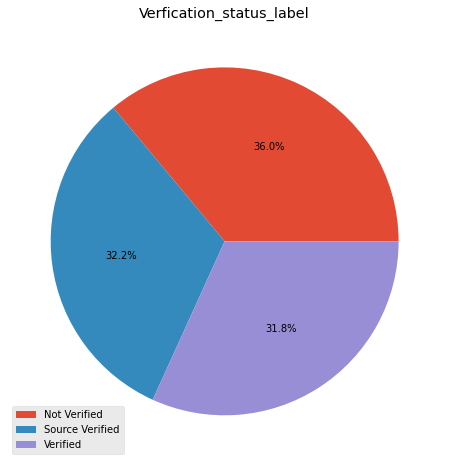

In [145]:
plt.pie(y.value_counts(), autopct='%1.1f%%')
plt.title('Verfication_status_label')
plt.legend(le.classes_)
plt.show()

## Pembangunan Model

In [135]:
X = df_loan_model.iloc[:,:-1]
X.head()

,issue_d,dti,funded_amnt_inv,total_rec_int,loan_amnt,total_pymnt_inv,total_pymnt,funded_amnt,annual_inc,installment
0,127,27.65,4975.0,861.07,5000,5831.78,5861.071414,5000,24000.0,162.87
1,127,1.00,2500.0,435.17,2500,1008.71,1008.710000,2500,30000.0,59.83
2,127,8.72,2400.0,603.65,2400,3003.65,3003.653644,2400,12252.0,84.33
3,127,20.00,10000.0,2209.33,10000,12226.30,12226.302210,10000,49200.0,339.31
4,127,17.94,3000.0,1009.07,3000,3242.17,3242.170000,3000,80000.0,67.79


In [136]:
y = df_loan_model.iloc[:,-1]
y.head()

0    2
1    1
2    0
3    1
4    1
Name: verification_status_label, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, stratify=y)

In [148]:
hgb = HistGradientBoostingClassifier()
hgb_acc = cross_val_score(hgb, X_train, y_train, scoring="accuracy", cv=5)
print("Akurasi masing-masing = ", hgb_acc)
print("Rata-rata = ", hgb_acc.mean())

Akurasi masing-masing =  [0.58391855 0.58459321 0.58762286 0.5838815  0.58512351]
Rata-rata =  0.5850279267314946


### Evaluasi dengan Data Test

In [152]:
hgb_fit = hgb.fit(X_train, y_train)

In [153]:
hgb_prediksi = hgb.predict(X_test)

In [160]:
print(classification_report(y_test, hgb_prediksi, target_names=le.classes_))

                 precision    recall  f1-score   support

   Not Verified       0.55      0.76      0.63     44417
Source Verified       0.56      0.45      0.50     44959
       Verified       0.67      0.55      0.61     50376

       accuracy                           0.58    139752
      macro avg       0.59      0.59      0.58    139752
   weighted avg       0.59      0.58      0.58    139752



In [163]:
cf_matrix = confusion_matrix(y_test, hgb_prediksi).transpose()
cf_matrix

array([[33598, 14798, 13246],
       [ 6822, 20181,  9172],
       [ 3997,  9980, 27958]])

Text(0.5, 1.0, 'Confusion Matrix RF1')

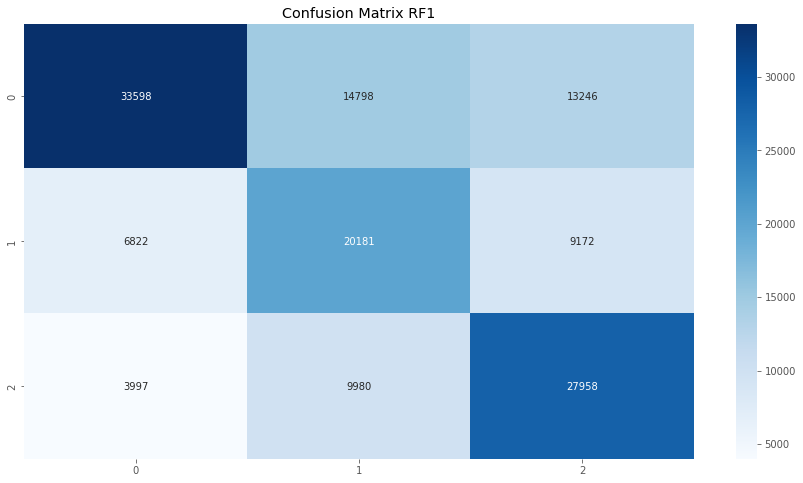

In [165]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix RF1') 

## Visualisasi Proses

In [166]:
df_loan.shape

(466285, 75)

In [183]:
n_fitur = [74, 47, 46, 42, 39, 38, 37, 10]
n_data = [466285, 466285, 465839, 465839, 465839, 465839, 465839, 465839]

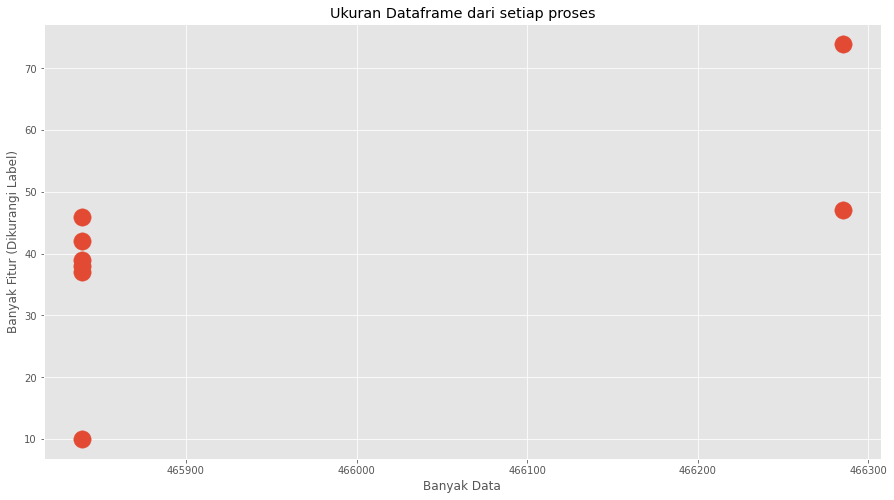

In [184]:
plt.scatter(x=n_data, y=n_fitur, s=300)
plt.title('Ukuran Dataframe dari setiap proses')
plt.xlabel('Banyak Data')
plt.ylabel('Banyak Fitur (Dikurangi Label)')
plt.show()

In [187]:
print("Banyak Data yang dipakai = ", n_data[-1]/n_data[0]*100, '%')
print("Banyak Fitur yang dipakai = ", n_fitur[-1]/n_fitur[0]*100, '%')

Banyak Data yang dipakai =  99.90435034367393 %
Banyak Fitur yang dipakai =  13.513513513513514 %
